In [337]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [338]:
# Get data
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))
train.columns
# Drop Id column
train.drop("Id", axis = 1, inplace = True)

train : (1460, 81)


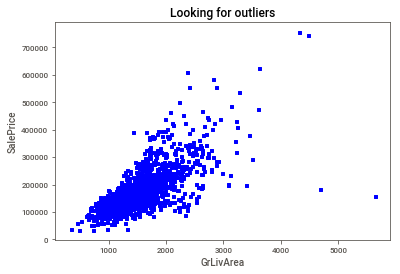

In [339]:
# handle outliers
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()
# removing outliers (area> 4000)
train = train[train.GrLivArea < 4000]

In [340]:
y = train.SalePrice

In [341]:
# which columns have missing values?
train.isnull().sum()
null_cols = train.columns[train.isnull().any()].tolist()
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [342]:
import sweetviz as sv
my_report = sv.analyze(train)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [343]:
# remove columns which have too many missing values and not high in feature importance as well as highly correlated features
drop_cols = ['Alley', 'FireplaceQu', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType']
retain_cols = [col for col in train.columns if col not in drop_cols]
train = train[retain_cols]
train.isnull().sum()
null_cols = train.columns[train.isnull().any()].tolist()
null_cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual']

In [344]:
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")

train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "Electrical"] = train.loc[:, "Electrical"].fillna("Unknown")
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")

In [345]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}
                      })

In [346]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000
OverallQual      0.801
GrLivArea        0.721
GarageCars       0.649
TotalBsmtSF      0.647
1stFlrSF         0.625
FullBath         0.559
TotRmsAbvGrd     0.537
YearBuilt        0.535
YearRemodAdd     0.521
MasVnrArea       0.474
Fireplaces       0.467
BsmtFinSF1       0.396
OpenPorchSF      0.330
WoodDeckSF       0.323
2ndFlrSF         0.297
HalfBath         0.283
LotArea          0.270
BsmtFullBath     0.236
BsmtUnfSF        0.221
LotFrontage      0.202
BedroomAbvGr     0.161
ScreenPorch      0.118
3SsnPorch        0.047
PoolArea         0.033
BsmtFinSF2      -0.009
LowQualFinSF    -0.025
BsmtHalfBath    -0.037
OverallCond     -0.080
EnclosedPorch   -0.130
KitchenAbvGr    -0.139
Name: SalePrice, dtype: float64


In [347]:
# Handle missing numerical values
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]
# Handle remaining missing values for numerical features by using median as replacement
train_num = train_num.fillna(train_num.median())

Numerical features : 30
Categorical features : 37


In [348]:
# handle highly skewed numerical features by log transform
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])
train_num.columns

23 skewed numerical features to log transform


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'],
      dtype='object')

In [349]:
# Create dummy features for categorical values via one-hot encoding
train_cat = pd.get_dummies(train_cat)

In [350]:
train = pd.concat([train_num, train_cat], axis = 1)

In [380]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

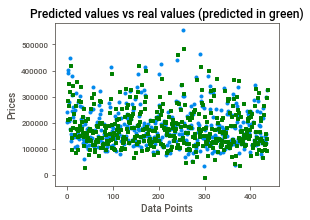

In [386]:
# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(range(0, len(y_test)), y_test)
ax.scatter(range(0, len(y_test_pred)), y_test_pred, c = "green", marker = "s")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title("Predicted values vs real values (predicted in green)")
plt.xlabel("Data Points")
plt.ylabel("Prices")
ax.axis('tight')
plt.show()

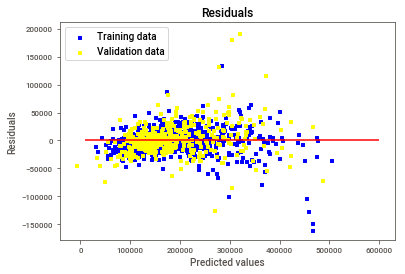

In [390]:
# plotting residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10000, xmax = 600000, color = "red")
plt.show()

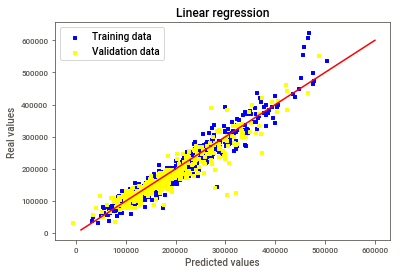

In [389]:
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10000, 600000], [10000, 600000], c = "red")
plt.show()

In [381]:
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 27345.63102057393
RMSE on Test set : 32550.799830634445
